<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Engineering:

1.Feature Transformation

    -missing values
    -outlier handle
    -scaling
    -encoding(categorical data)
    -mathematical (log,exp,box-code)

2.Feature Construction

3.Feature Selection
   -dimension reduction process(PCA)

4.Feature extraction
   -reduce the dimension of the data

1.Scaling

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [3]:
df.to_csv("social_net_ads.csv",index=False)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df=df.iloc[:,2:]

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


train test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [9]:
df.shape

(400, 3)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.25)

In [12]:
X_train

,Age,EstimatedSalary
91,30.0,116000.0
163,35.0,38000.0
13,32.0,18000.0
354,36.0,99000.0
370,60.0,46000.0
...,...,...
79,26.0,17000.0
322,41.0,52000.0
351,37.0,75000.0
276,38.0,71000.0


In [13]:
X_test

,Age,EstimatedSalary
397,50.0,20000.0
118,40.0,59000.0
82,20.0,49000.0
18,46.0,28000.0
247,57.0,122000.0
...,...,...
391,47.0,23000.0
253,37.0,146000.0
286,37.0,62000.0
87,28.0,85000.0


In [14]:
y_train

91     0
163    0
13     0
354    1
370    1
      ..
79     0
322    0
351    0
276    0
86     0
Name: Purchased, Length: 300, dtype: int64

In [15]:
y_test

397    1
118    0
82     0
18     1
247    1
      ..
391    1
253    1
286    0
87     0
173    0
Name: Purchased, Length: 100, dtype: int64

Standard Scalar

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaled=scaler.transform(X_train)

In [20]:
X_test_scaled=scaler.transform(X_test)

In [21]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [22]:
X_train_scaled

,Age,EstimatedSalary
0,-0.744345,1.315315
1,-0.260166,-0.943151
2,-0.550673,-1.522245
3,-0.163330,0.823085
4,2.160731,-0.711513
...,...,...
295,-1.131688,-1.551199
296,0.320849,-0.537785
297,-0.066494,0.128173
298,0.030342,0.012354


In [25]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.686667,70573.333333
std,10.344007,34594.419614
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,45.000000,88000.000000
max,60.000000,150000.000000


In [26]:
X_train_scaled

,Age,EstimatedSalary
0,-0.744345,1.315315
1,-0.260166,-0.943151
2,-0.550673,-1.522245
3,-0.163330,0.823085
4,2.160731,-0.711513
...,...,...
295,-1.131688,-1.551199
296,0.320849,-0.537785
297,-0.066494,0.128173
298,0.030342,0.012354


In [27]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.7,0.5
max,2.2,2.3


#Effect on Scaling

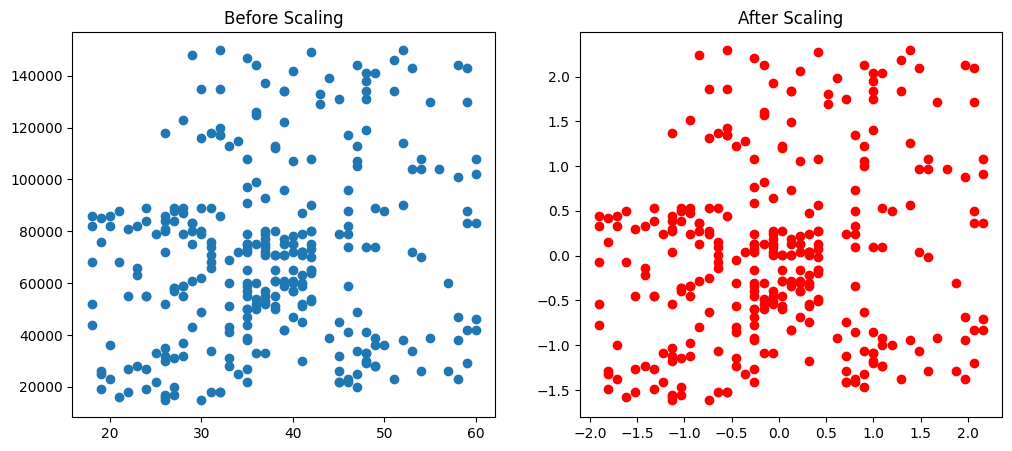

In [28]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

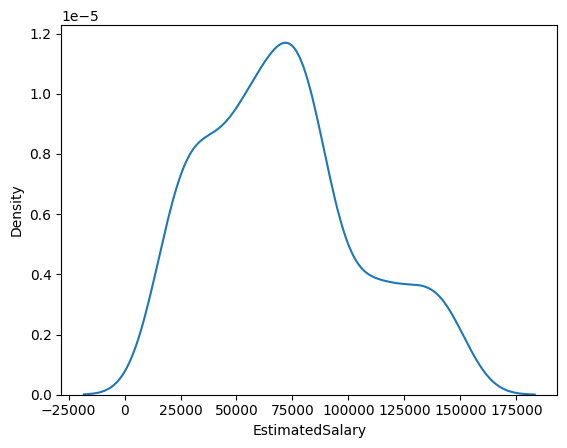

In [30]:
# model
import seaborn as sns
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

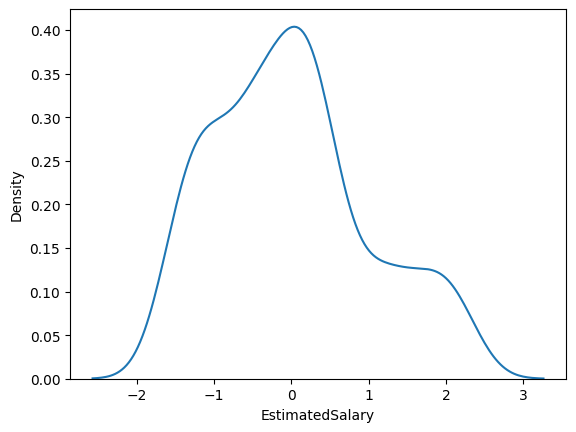

In [32]:
#model
import seaborn as sns
sns.kdeplot(X_train_scaled['EstimatedSalary'])

In [33]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.686667,70573.333333
std,10.344007,34594.419614
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,45.000000,88000.000000
max,60.000000,150000.000000


In [34]:
#min-max
from sklearn.preprocessing import MinMaxScaler
scler_min_max=MinMaxScaler()

In [35]:
scler_min_max.fit(X_train)

MinMaxScaler()

In [36]:
X_train_min_max=scler_min_max.transform(X_train)

In [37]:
X_test_min_max=scler_min_max.transform(X_test)

In [38]:
X_train_min_max

array([[0.28571429, 0.74814815],
       [0.4047619 , 0.17037037],
       [0.33333333, 0.02222222],
       [0.42857143, 0.62222222],
       [1.        , 0.22962963],
       [0.33333333, 0.52592593],
       [0.80952381, 0.17037037],
       [0.45238095, 0.45925926],
       [0.97619048, 0.2       ],
       [0.04761905, 0.05925926],
       [0.5       , 0.88148148],
       [0.52380952, 0.23703704],
       [0.19047619, 0.27407407],
       [0.        , 0.21481481],
       [0.78571429, 0.05925926],
       [0.71428571, 0.13333333],
       [0.54761905, 0.26666667],
       [0.92857143, 0.33333333],
       [0.19047619, 0.        ],
       [0.19047619, 0.14814815],
       [0.45238095, 0.31111111],
       [0.45238095, 0.27407407],
       [0.35714286, 0.11851852],
       [0.47619048, 0.37037037],
       [0.66666667, 0.54074074],
       [0.85714286, 0.68888889],
       [0.23809524, 0.2962963 ],
       [0.4047619 , 0.44444444],
       [0.5952381 , 0.84444444],
       [0.66666667, 0.75555556],
       [0.

In [39]:
X_test_min_max

array([[0.76190476, 0.03703704],
       [0.52380952, 0.32592593],
       [0.04761905, 0.25185185],
       [0.66666667, 0.0962963 ],
       [0.92857143, 0.79259259],
       [0.97619048, 0.45185185],
       [0.19047619, 0.        ],
       [0.45238095, 0.46666667],
       [0.5       , 0.47407407],
       [1.        , 0.2       ],
       [0.69047619, 0.11111111],
       [0.66666667, 0.12592593],
       [0.54761905, 0.42222222],
       [0.69047619, 0.25925926],
       [0.4047619 , 0.34074074],
       [0.30952381, 0.31851852],
       [0.57142857, 0.28888889],
       [0.14285714, 0.31851852],
       [0.16666667, 0.48148148],
       [0.4047619 , 0.41481481],
       [0.54761905, 0.27407407],
       [0.57142857, 0.65925926],
       [0.9047619 , 0.87407407],
       [0.47619048, 0.25925926],
       [0.92857143, 0.13333333],
       [0.54761905, 0.48148148],
       [0.28571429, 0.01481481],
       [0.19047619, 0.20740741],
       [0.02380952, 0.40740741],
       [0.45238095, 0.48148148],
       [0.

In [40]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max = pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [41]:
np.round(X_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.6,0.5
max,1.0,1.0


In [42]:
X_test_min_max

,Age,EstimatedSalary
0,0.761905,0.037037
1,0.523810,0.325926
2,0.047619,0.251852
3,0.666667,0.096296
4,0.928571,0.792593
...,...,...
95,0.690476,0.059259
96,0.452381,0.970370
97,0.452381,0.348148
98,0.238095,0.518519


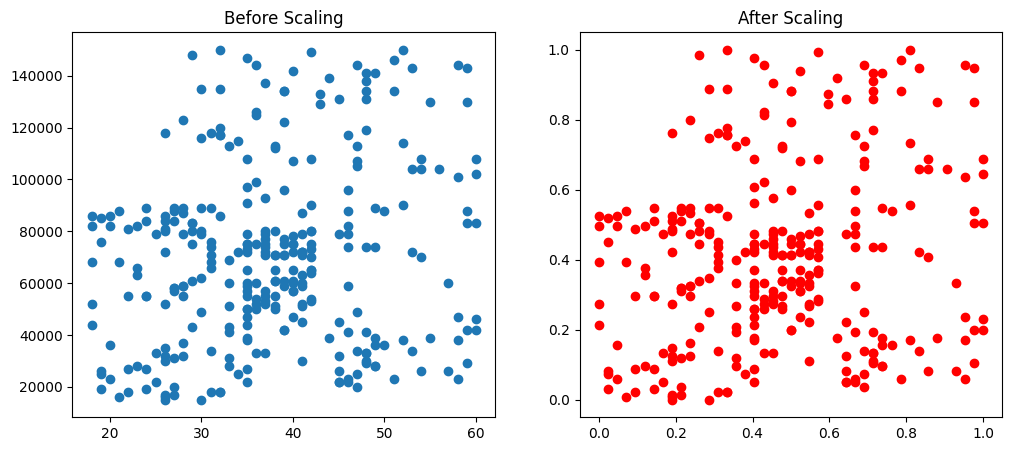

In [43]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

\# when we should use which technique

In [ ]:
CGPA=0 to 1 min-max for the specific range you can use min-max

SALARY= if you dont know the range of the data you can use std_scaler

#ENCODING

In [67]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [46]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [66]:
df2.to_csv("custmor.csv",index=False)

In [48]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [49]:
df2.sample(5)

,age,gender,review,education,purchased
37,94,Male,Average,PG,Yes
49,25,Female,Good,UG,No
13,57,Female,Average,School,No
4,16,Female,Average,UG,No
40,39,Male,Good,School,No


In [51]:
df2=df2.iloc[:,2:-1]

In [52]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [53]:
df2.shape

(50, 2)

In [54]:
X_train,X_test=train_test_split(df2,test_size=0.25)

In [55]:
X_train

,review,education
25,Good,School
32,Average,UG
6,Good,School
7,Poor,School
2,Good,PG
27,Poor,PG
38,Good,School
18,Good,School
41,Good,PG
35,Poor,School


In [56]:
X_test

,review,education
12,Poor,School
11,Good,UG
8,Average,UG
34,Average,School
47,Good,PG
28,Poor,School
30,Average,UG
43,Poor,PG
0,Average,School
44,Average,UG


In [57]:
df2["review"].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [58]:
df2["education"].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import OrdinalEncoder

In [60]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],["School","UG","PG"]])

In [61]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [62]:
X_train_encode=encoder.transform(X_train)

In [63]:
X_train_encode

array([[2., 0.],
       [1., 1.],
       [2., 0.],
       [0., 0.],
       [2., 2.],
       [0., 2.],
       [2., 0.],
       [2., 0.],
       [2., 2.],
       [0., 0.],
       [2., 0.],
       [0., 2.],
       [2., 1.],
       [1., 0.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [2., 2.],
       [2., 2.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [2., 1.],
       [1., 1.],
       [2., 2.],
       [2., 1.],
       [0., 2.],
       [0., 1.],
       [1., 0.],
       [1., 2.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [0., 2.]])

In [64]:
encoder.transform(X_test)

array([[0., 0.],
       [2., 1.],
       [1., 1.],
       [1., 0.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [0., 2.],
       [1., 1.],
       [1., 0.]])

In [68]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [69]:
df2=df2[["gender","age"]]

In [70]:
df2

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int32)

In [73]:
ohe.fit(df2[["gender"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [74]:
ohe.transform(df2[["gender"]])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [93]:
# handle missing value

df3=pd.read_csv("train.csv")

In [76]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df3=df3[["Age","Fare","SibSp","Survived"]]

In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [79]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [81]:
df3.isnull().sum()

Age         177
Fare          0
SibSp         0
Survived      0
dtype: int64

In [82]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

In [ ]:
# numeric--> mean,median

# cat--> mode

In [83]:
X_train,X_test=train_test_split(df3,test_size=0.25)

In [84]:
X_train

,Age,Fare,SibSp,Survived
872,33.0,5.0000,0,0
282,16.0,9.5000,0,0
13,39.0,31.2750,1,0
616,34.0,14.4000,1,0
727,NaN,7.7375,0,1
...,...,...,...,...
9,14.0,30.0708,1,1
858,24.0,19.2583,0,1
516,34.0,10.5000,0,1
828,NaN,7.7500,0,1


In [85]:
X_test

,Age,Fare,SibSp,Survived
393,23.0,113.2750,1,1
751,6.0,12.4750,0,1
272,41.0,19.5000,0,1
320,22.0,7.2500,0,0
189,36.0,7.8958,0,0
...,...,...,...,...
548,33.0,20.5250,1,0
562,28.0,13.5000,0,0
587,60.0,79.2000,1,1
642,2.0,27.9000,3,0


In [86]:
mean_age=X_train["Age"].mean()

In [88]:
mean_age

29.17556179775281

In [87]:
X_train["Age"].fillna(mean_age)

872    33.000000
282    16.000000
13     39.000000
616    34.000000
727    29.175562
         ...    
9      14.000000
858    24.000000
516    34.000000
828    29.175562
739    29.175562
Name: Age, Length: 668, dtype: float64

In [89]:
mediann_age=X_train["Age"].median()

In [90]:
mediann_age

28.0

In [91]:
X_train["Age"].fillna(mediann_age)

872    33.0
282    16.0
13     39.0
616    34.0
727    28.0
       ... 
9      14.0
858    24.0
516    34.0
828    28.0
739    28.0
Name: Age, Length: 668, dtype: float64

In [ ]:
#sklearn

# simpleimputer

In [94]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [95]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [ ]:
# multivariate

# knnimputer